## Sign-language-digits in Fastai (version with mixed precision)

Target: Create a classifier that can intepret sign language for number 0 to 9.

Source: https://github.com/ardamavi/Sign-Language-Digits-Dataset

In [1]:
from fastai.vision import *

In [2]:
path = 'Sign-Language-Digits-Dataset/Dataset/'

In [3]:
#data without data augumentation
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
         size=100, num_workers=4, bs=64).normalize(imagenet_stats)

In [4]:
# some info about dataset
print(data.classes)
print(data.c)
print(len(data.train_ds))
print(len(data.valid_ds))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
10
1650
412


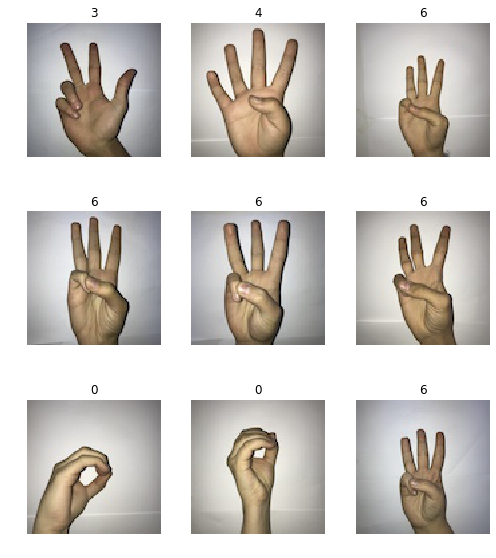

In [5]:
# data sample
data.show_batch(rows=3, figsize=(7,8))

In [6]:
# model: resnet34 with mixed precision
learn = cnn_learner(data, models.resnet34, metrics=accuracy).to_fp16()
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.913582,0.890713,0.684466,00:03
1,1.136963,0.531131,0.783981,00:02
2,0.762034,0.431459,0.849515,00:03
3,0.534425,0.419808,0.839806,00:02
4,0.400738,0.417561,0.847087,00:02


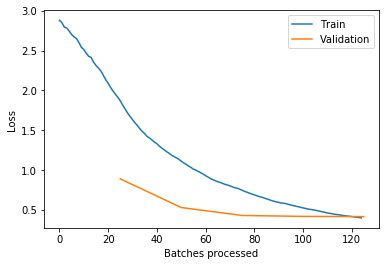

In [7]:
learn.recorder.plot_losses()

In [8]:
# resnet34 with data augumentation and mixed precision
learn = cnn_learner(data, models.resnet34, metrics=accuracy).to_fp16()
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.006099,0.946664,0.689320,00:03
1,1.203783,0.557686,0.810680,00:03
2,0.784978,0.494579,0.827670,00:03
3,0.541254,0.477166,0.837379,00:03
4,0.406719,0.464165,0.844660,00:03


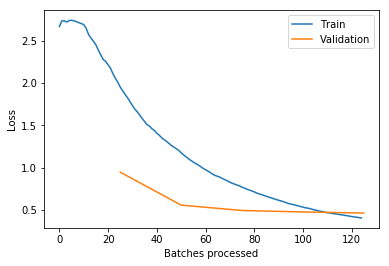

In [9]:
learn.recorder.plot_losses()

In [10]:
# resnet34 with unfreeze and mixed precision
learn = cnn_learner(data, models.resnet34, metrics=accuracy).to_fp16()
learn.unfreeze()
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.567016,0.561723,0.813107,00:03
1,0.708146,0.064951,0.985437,00:03
2,0.371297,0.025487,0.992718,00:03
3,0.212996,0.014948,0.997573,00:03
4,0.125401,0.018595,0.992718,00:03


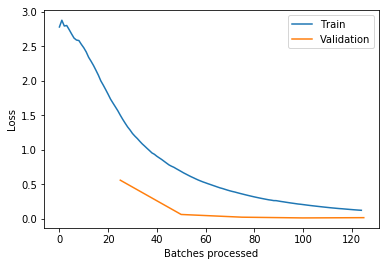

In [11]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


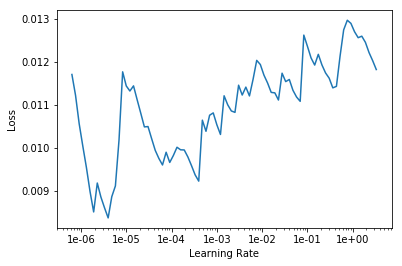

In [12]:
# search the best learning rate
learn.lr_find()
learn.recorder.plot()

In [13]:
# training
learn.fit_one_cycle(5, max_lr=slice(1e-06, 1e-05))

epoch,train_loss,valid_loss,accuracy,time
0,0.013665,0.015730,0.992718,00:03
1,0.012060,0.015735,0.992718,00:03
2,0.011728,0.016608,0.992718,00:03
3,0.010235,0.017113,0.992718,00:03
4,0.010980,0.017159,0.992718,00:03


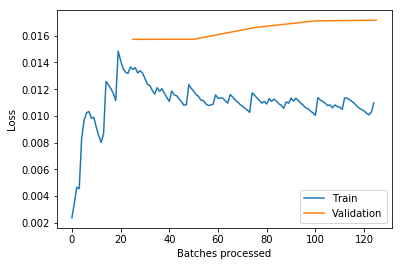

In [14]:
learn.recorder.plot_losses()

In [17]:
# another model: resnet50 without data augumentation
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
       size=100, num_workers=4, bs=64).normalize(imagenet_stats)

learn = cnn_learner(data, models.resnet50, metrics=accuracy).to_fp16()

learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.653927,0.713469,0.774272,00:04
1,0.983244,0.529551,0.805825,00:03
2,0.630663,0.462570,0.837379,00:03
3,0.410352,0.445058,0.849515,00:04
4,0.285996,0.440676,0.842233,00:03


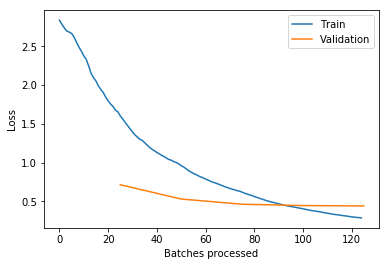

In [18]:
learn.recorder.plot_losses()

In [19]:
# resnet50 with data augumentation
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=100, num_workers=4, bs=64).normalize(imagenet_stats)

learn = cnn_learner(data, models.resnet50, metrics=accuracy).to_fp16()

learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.783008,0.928246,0.728155,00:03
1,1.196005,0.794858,0.725728,00:03
2,0.941373,0.654857,0.769417,00:03
3,0.769151,0.575146,0.796117,00:03
4,0.667393,0.555022,0.805825,00:03


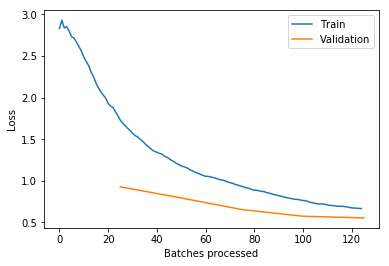

In [20]:
learn.recorder.plot_losses()

In [21]:
# resnet34 with unfreeze and mixed precision
learn = cnn_learner(data, models.resnet50, metrics=accuracy).to_fp16()
learn.unfreeze()
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.590158,0.768078,0.781553,00:04
1,0.797356,0.142888,0.958738,00:04
2,0.461107,0.076785,0.973301,00:04
3,0.290033,0.046602,0.992718,00:04
4,0.188809,0.042254,0.987864,00:04


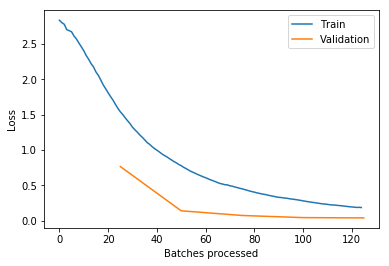

In [22]:
learn.recorder.plot_losses()

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [26]:
# resnet50 with learning rate
learn.fit_one_cycle(5, max_lr=1e-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.060287,0.040707,0.992718,00:04
1,0.056104,0.042122,0.992718,00:04
2,0.054568,0.042419,0.990291,00:04
3,0.052249,0.037024,0.992718,00:04
4,0.052571,0.041178,0.992718,00:04


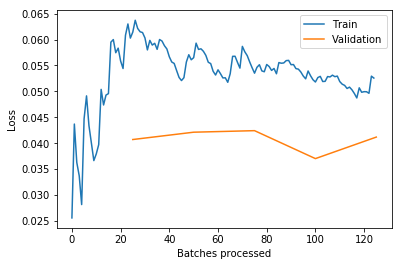

In [27]:
learn.recorder.plot_losses()